# ImageNet 1K data quality analyze


In [8]:
import lance
import duckdb
import torchvision
import torch

In [15]:
%load_ext sql
%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
{}


In [9]:
uri = "~/tmp/data/imagenet.lance"

ds = lance.dataset(uri)

In [4]:
ds.schema

image: extension<image[binary]<ImageBinaryType>>
label: dictionary<values=string, indices=int16, ordered=0>
split: dictionary<values=string, indices=int64, ordered=0>

In [10]:
ds

In [16]:
# %%sql --lance

# SELECT image, label FROM ds LIMIT 5

Took 0.7589237689971924


OverflowError: Overlong 3 byte UTF-8 sequence detected when encoding string

In [19]:
%%sql

SELECT split, count(split) FROM ds GROUP BY split

Took 0.006701946258544922


,split,count(split)
0,train,20000
1,validation,20000
2,test,20000


In [23]:
from torchvision.models import resnet50, vit_b_16

resnet = resnet50(weights="DEFAULT")
vit = vit_b_16(weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/lei/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /home/lei/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

In [25]:
# TODO: make easy conversion between lance.Dataset and pytorch.Dataset

from lance.pytorch import Dataset
dataset = Dataset(uri, columns=["image", "split"])

print(next(iter(dataset)))

[<PIL.Image.Image image mode=RGB size=817x363 at 0x7FDE6F32C190>, 'train']


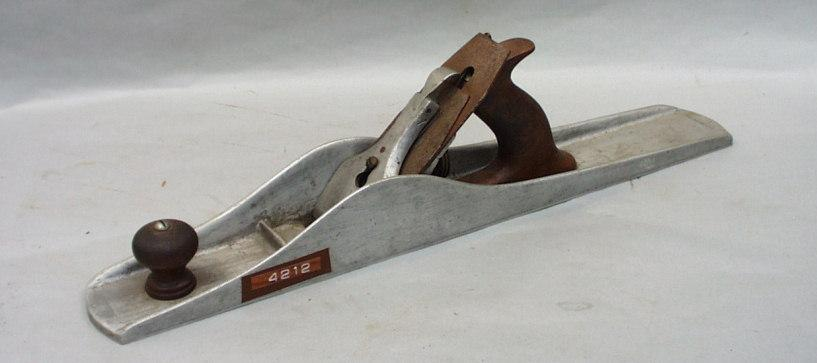

In [27]:
next(iter(dataset))[0]